In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



In [ ]:
ds = pd.read_excel('https://raw.github.com/Pamela2710/Data-Mining/c000b43fcecd898e85faa43ac6eae9262fbc531b/Clustering/dataset(wq).xlsx')
ds

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
scaler = MinMaxScaler()
# Normalización
df_normalized = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)
df_normalized

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0.247788,0.000490,0.00,0.068493,0.106845,0.140845,0.098940,7.729073e-19,0.606299,0.137725,7.371007e-17
1,0.283186,0.000641,0.00,0.116438,0.143573,0.338028,0.215548,6.729192e-19,0.362205,0.209581,1.031941e-16
2,0.283186,0.000540,0.04,0.095890,0.133556,0.197183,0.169611,6.929168e-19,0.409449,0.191617,1.031941e-16
3,0.584071,0.000135,0.56,0.068493,0.105175,0.225352,0.190813,7.929049e-19,0.330709,0.149701,1.031941e-16
4,0.247788,0.000490,0.00,0.068493,0.106845,0.140845,0.098940,7.729073e-19,0.606299,0.137725,7.371007e-17
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.000405,0.08,0.075342,0.130217,0.436620,0.134276,4.829420e-19,0.559055,0.149701,1.547912e-16
1595,0.115044,0.000363,0.10,0.089041,0.083472,0.535211,0.159011,5.049394e-19,0.614173,0.257485,2.063882e-16
1596,0.150442,0.000329,0.13,0.095890,0.106845,0.394366,0.120141,5.669320e-19,0.535433,0.251497,1.916462e-16
1597,0.115044,0.000443,0.12,0.075342,0.105175,0.436620,0.134276,5.399352e-19,0.653543,0.227545,1.326781e-16


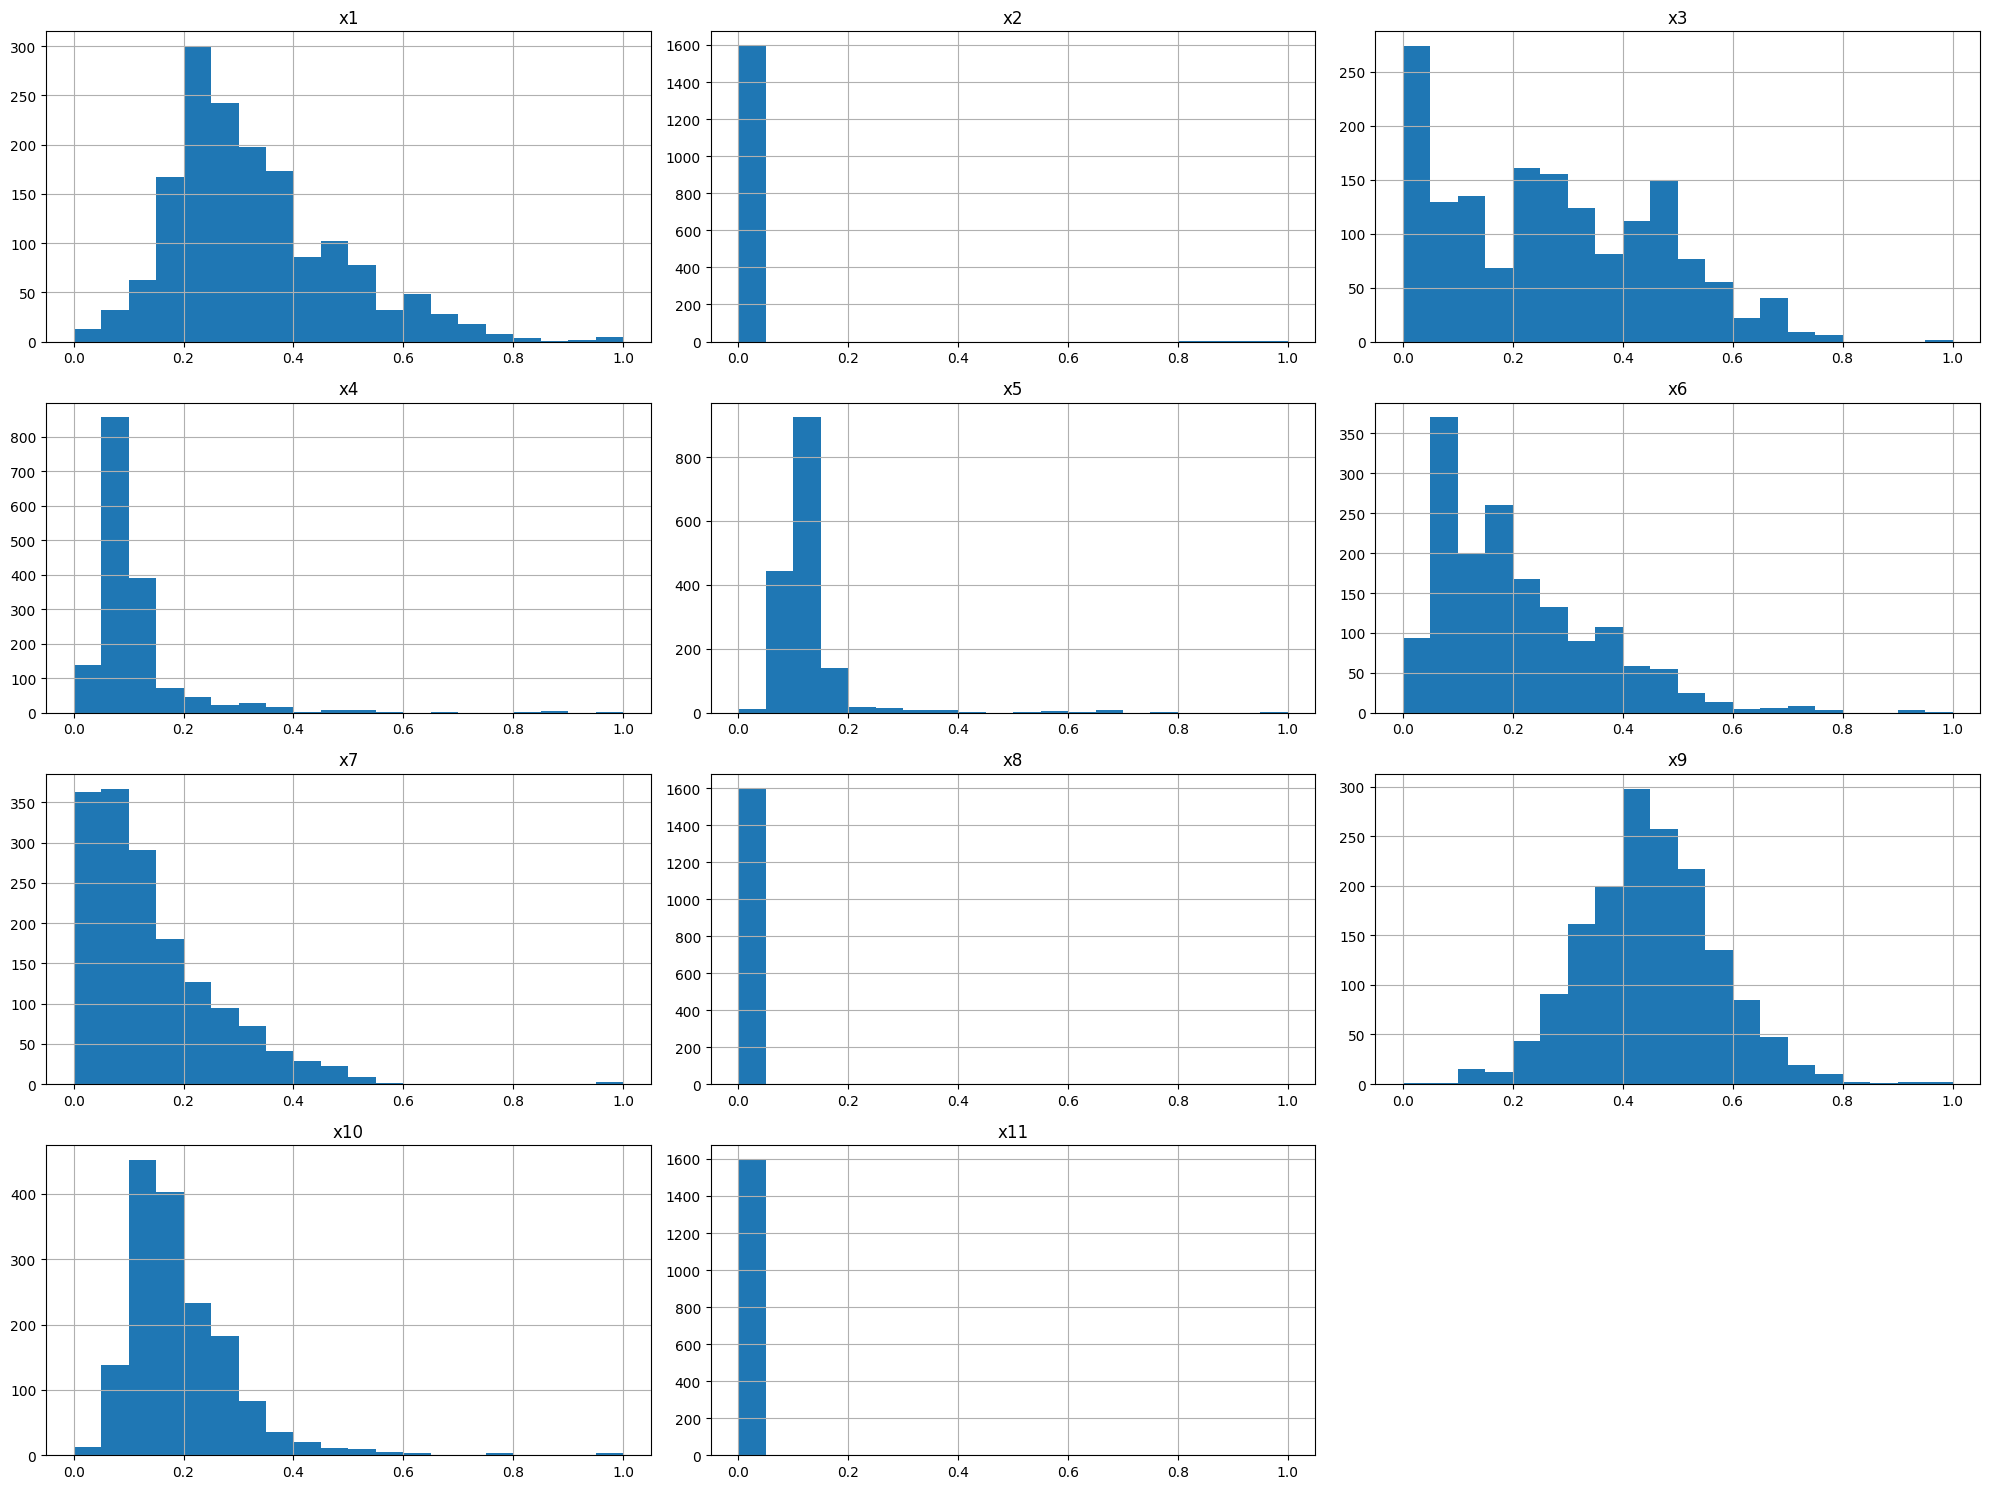

In [ ]:
df_normalized.hist(figsize=(20, 15), bins=20)
plt.tight_layout()  # Adjusts subplots to fit in to the figure area.
plt.show()

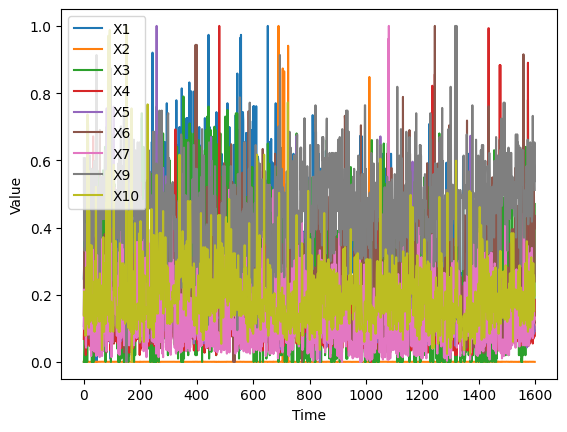

In [ ]:
# @title Time series of X1, X2, X3, X4, X5, X6, X7, X9, and X10
plt.plot(df_normalized['x1'], label='X1')
plt.plot(df_normalized['x2'], label='X2')
plt.plot(df_normalized['x3'], label='X3')
plt.plot(df_normalized['x4'], label='X4')
plt.plot(df_normalized['x5'], label='X5')
plt.plot(df_normalized['x6'], label='X6')
plt.plot(df_normalized['x7'], label='X7')
plt.plot(df_normalized['x9'], label='X9')
plt.plot(df_normalized['x10'], label='X10')
plt.xlabel('Time')
plt.ylabel('Value')
_ = plt.legend()

# Mean Shift Clustering

In [ ]:
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for bandwidth in np.linspace(0.5, 1.0, 10):  #rango de bandwidth
    print("Bandwidth:", bandwidth)
    mean_shift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
    mean_shift_labels = mean_shift.fit_predict(df_normalized)
    print("Clusters:",len(np.unique(mean_shift_labels)))
    # Calcula las métricas
    silhouette = silhouette_score(df_normalized, mean_shift_labels)
    calinski_harabasz = calinski_harabasz_score(df_normalized, mean_shift_labels)
    davies_bouldin = davies_bouldin_score(df_normalized, mean_shift_labels)

    print("Silhouette Coefficient:", silhouette)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    print("Davies-Bouldin Index:", davies_bouldin)

    # Almacena las métricas en las listas
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)


Bandwidth: 0.5
Clusters: 8
Silhouette Coefficient: 0.4738810492887443
Calinski-Harabasz Index: 29.275709518879342
Davies-Bouldin Index: 0.8049264566504277
Bandwidth: 0.5555555555555556
Clusters: 6
Silhouette Coefficient: 0.4926448791921103
Calinski-Harabasz Index: 33.285243326324235
Davies-Bouldin Index: 0.6434582554162267
Bandwidth: 0.6111111111111112
Clusters: 6
Silhouette Coefficient: 0.4926448791921103
Calinski-Harabasz Index: 33.285243326324235
Davies-Bouldin Index: 0.6434582554162267
Bandwidth: 0.6666666666666666
Clusters: 5
Silhouette Coefficient: 0.5185708235929746
Calinski-Harabasz Index: 27.398431193409518
Davies-Bouldin Index: 0.6486122333995277
Bandwidth: 0.7222222222222222
Clusters: 4
Silhouette Coefficient: 0.5252376700017648
Calinski-Harabasz Index: 18.033593857589906
Davies-Bouldin Index: 0.546098004464903
Bandwidth: 0.7777777777777778
Clusters: 4
Silhouette Coefficient: 0.5252376700017648
Calinski-Harabasz Index: 18.033593857589906
Davies-Bouldin Index: 0.5460980044649

In [ ]:
#mejor valor de bandwidth basado en las métricas
best_bandwidth_silhouette = np.max(silhouette_scores)
best_bandwidth_calinski_harabasz = np.max(calinski_harabasz_scores)
best_bandwidth_davies_bouldin = np.min(davies_bouldin_scores)

print("Mejor bandwidth basado en Silhouette Coefficient:", best_bandwidth_silhouette, 'item:', np.argmax(silhouette_scores))
print("Mejor bandwidth basado en Calinski-Harabasz Index:", best_bandwidth_calinski_harabasz, 'item:', np.argmax(calinski_harabasz_scores))
print("Mejor bandwidth basado en Davies-Bouldin Index:", best_bandwidth_davies_bouldin, 'item:', np.argmin(davies_bouldin_scores))

Mejor bandwidth basado en Silhouette Coefficient: 0.5912911895652693 item: 8
Mejor bandwidth basado en Calinski-Harabasz Index: 33.285243326324235 item: 1
Mejor bandwidth basado en Davies-Bouldin Index: 0.3010187650390464 item: 8


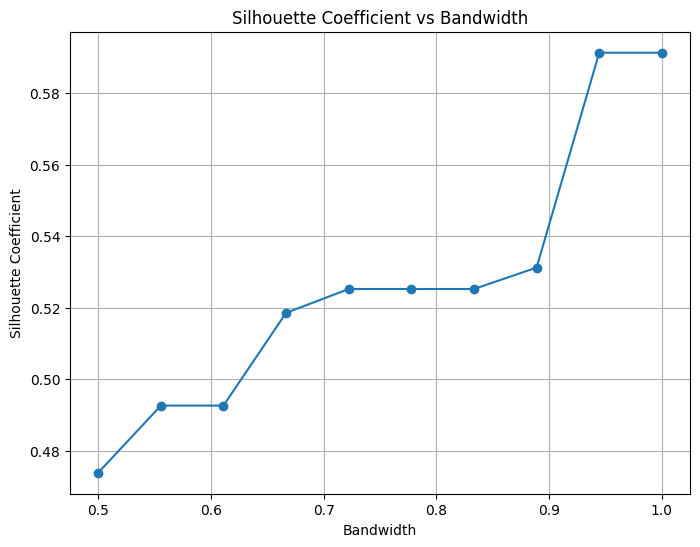

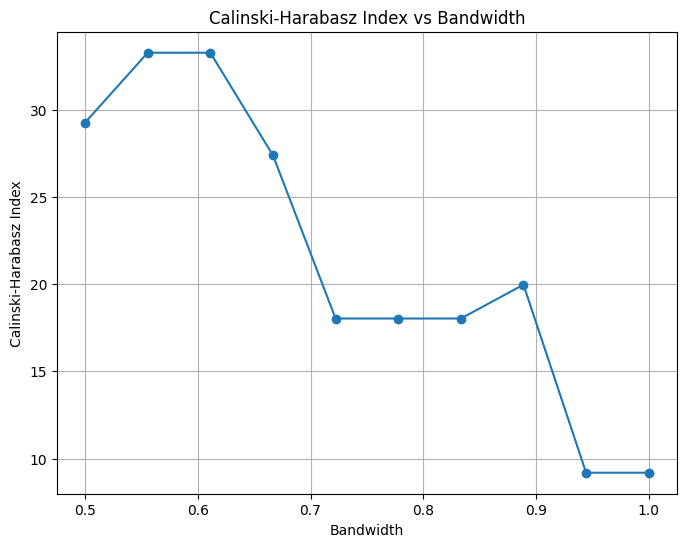

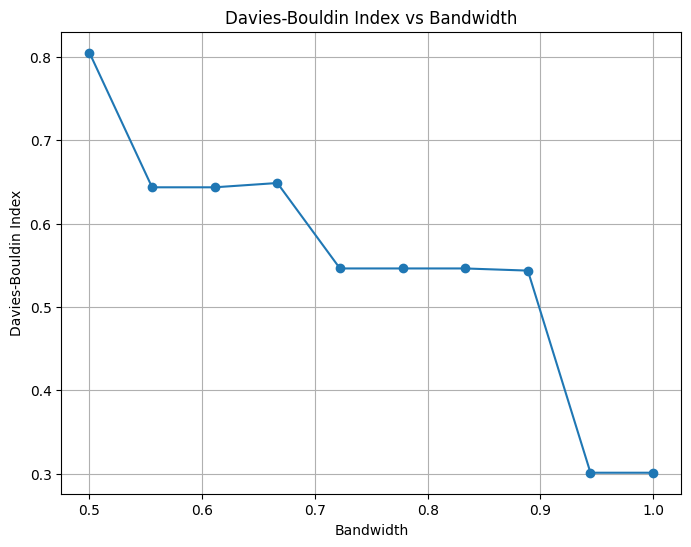

In [ ]:
bandwidth_values = np.linspace(0.5, 1.0, 10)  # Valores de bandwidth utilizados

# Gráfico para Silhouette Coefficient
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_values, silhouette_scores, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs Bandwidth')
plt.grid(True)
plt.show()

# Gráfico para Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_values, calinski_harabasz_scores, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Bandwidth')
plt.grid(True)
plt.show()

# Gráfico para Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_values, davies_bouldin_scores, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Bandwidth')
plt.grid(True)
plt.show()

Bandwidth: 0.9
Clusters: 3


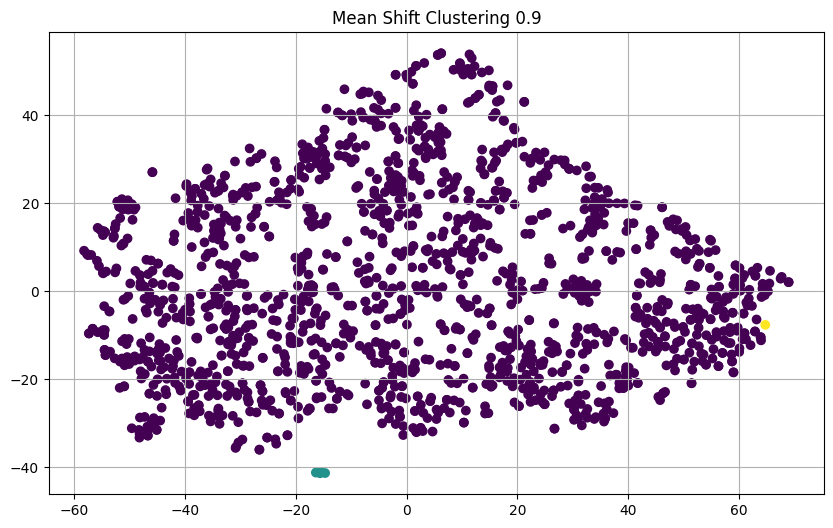

Bandwidth: 0.95
Clusters: 2


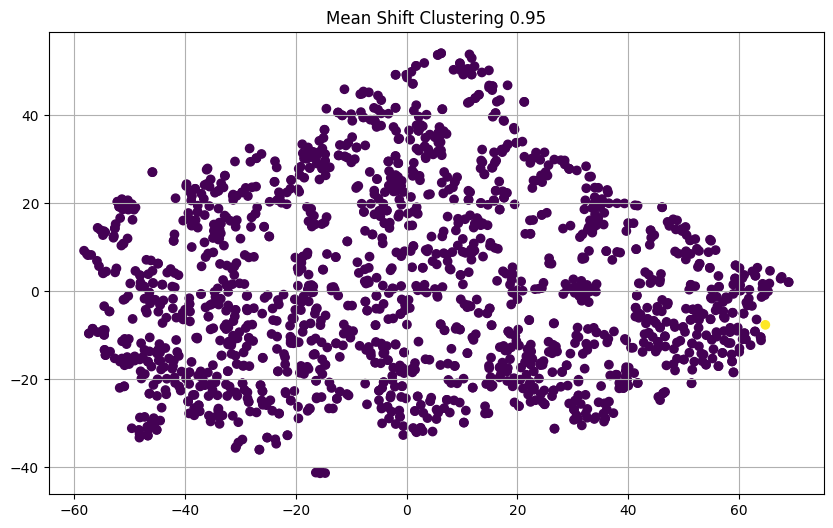

Bandwidth: 1.0
Clusters: 2


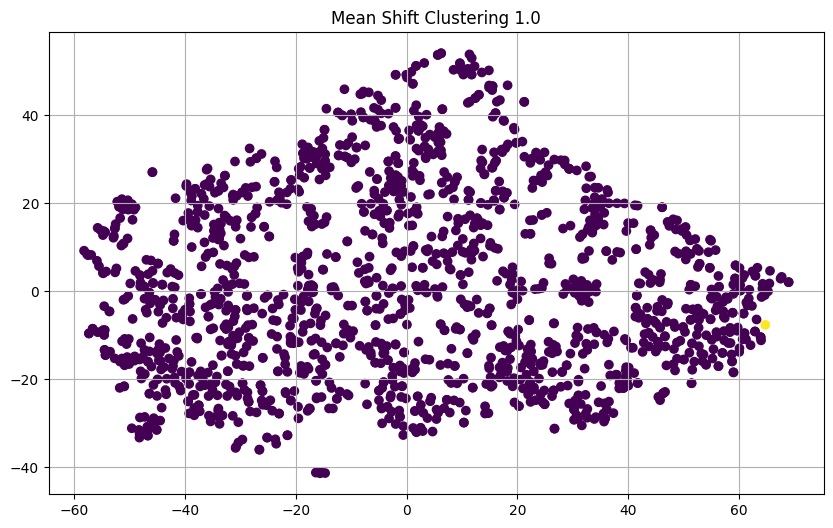

In [ ]:
for bandwidth in [0.90,0.95,1.0]: #np.linspace(0.1, 1.0, 30):
    # Inicializa el modelo MeanShift con el bandwidth actual
    print("Bandwidth:", bandwidth)
    mean_shift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
    mean_shift_labels = mean_shift.fit_predict(df_normalized)
    print("Clusters:",len(np.unique(mean_shift_labels)))

    # Inicializar y ajustar el modelo t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(df_normalized)
    # Calcula las métricas
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=mean_shift_labels, cmap='viridis')
    plt.title(f'Mean Shift Clustering {bandwidth}')
    plt.grid(True)
    plt.show()


# Detectar y eliminar outliers usando clustering

In [ ]:
# Ajustar el modelo MeanShift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(df_normalized)

# Contar el número de puntos en cada clúster
cluster_counts = np.bincount(mean_shift_labels)

# Identificar clústeres con pocos puntos (posibles outliers)
outlier_clusters = np.where(cluster_counts < 15)[0]

# Eliminar outliers
cleaned_data = df_normalized[~np.isin(mean_shift_labels, outlier_clusters)]

In [ ]:
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for bandwidth in np.linspace(0.28, 0.306, 10):  #rango de bandwidth
    print("Bandwidth:", bandwidth)
    mean_shift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
    mean_shift_labels = mean_shift.fit_predict(cleaned_data)
    print("Clusters:",len(np.unique(mean_shift_labels)))
    # Calcula las métricas
    silhouette = silhouette_score(cleaned_data, mean_shift_labels)
    calinski_harabasz = calinski_harabasz_score(cleaned_data, mean_shift_labels)
    davies_bouldin = davies_bouldin_score(cleaned_data, mean_shift_labels)

    print("Silhouette Coefficient:", silhouette)
    print("Calinski-Harabasz Index:", calinski_harabasz)
    print("Davies-Bouldin Index:", davies_bouldin)

    # Almacena las métricas en las listas
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)


Bandwidth: 0.28
Clusters: 10
Silhouette Coefficient: 0.14104509636954451
Calinski-Harabasz Index: 93.67136480980871
Davies-Bouldin Index: 1.4064305566625377
Bandwidth: 0.2828888888888889
Clusters: 8
Silhouette Coefficient: 0.14675431091673405
Calinski-Harabasz Index: 71.03517964924522
Davies-Bouldin Index: 1.5378894439100774
Bandwidth: 0.2857777777777778
Clusters: 8
Silhouette Coefficient: 0.14947747179089388
Calinski-Harabasz Index: 69.39739715683575
Davies-Bouldin Index: 1.5177287865200104
Bandwidth: 0.2886666666666667
Clusters: 6
Silhouette Coefficient: 0.1652938998263446
Calinski-Harabasz Index: 42.52136448986142
Davies-Bouldin Index: 1.5720438865839783
Bandwidth: 0.29155555555555557
Clusters: 5
Silhouette Coefficient: 0.2760972969254725
Calinski-Harabasz Index: 37.14572256330042
Davies-Bouldin Index: 1.3871387920672529
Bandwidth: 0.29444444444444445
Clusters: 5
Silhouette Coefficient: 0.2760972969254725
Calinski-Harabasz Index: 37.14572256330042
Davies-Bouldin Index: 1.38713879206

In [ ]:
#mejor valor de bandwidth basado en las métricas
best_bandwidth_silhouette = np.max(silhouette_scores)
best_bandwidth_calinski_harabasz = np.max(calinski_harabasz_scores)
best_bandwidth_davies_bouldin = np.min(davies_bouldin_scores)

print("Mejor bandwidth basado en Silhouette Coefficient:", best_bandwidth_silhouette, 'item:', np.argmax(silhouette_scores))
print("Mejor bandwidth basado en Calinski-Harabasz Index:", best_bandwidth_calinski_harabasz, 'item:', np.argmax(calinski_harabasz_scores))
print("Mejor bandwidth basado en Davies-Bouldin Index:", best_bandwidth_davies_bouldin, 'item:', np.argmin(davies_bouldin_scores))

Mejor bandwidth basado en Silhouette Coefficient: 0.342910157629324 item: 9
Mejor bandwidth basado en Calinski-Harabasz Index: 93.67136480980871 item: 0
Mejor bandwidth basado en Davies-Bouldin Index: 1.3024645354187006 item: 6


Bandwidth: 0.28
Clusters: 10


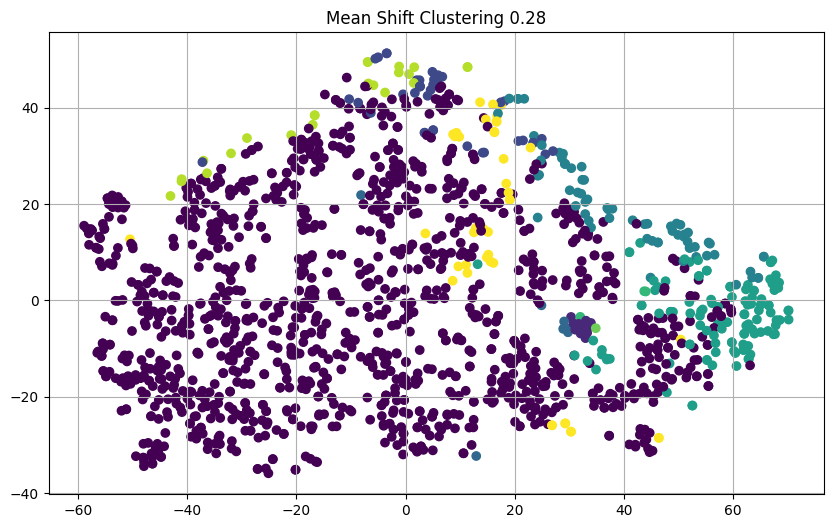

Bandwidth: 0.29733333333333334
Clusters: 5


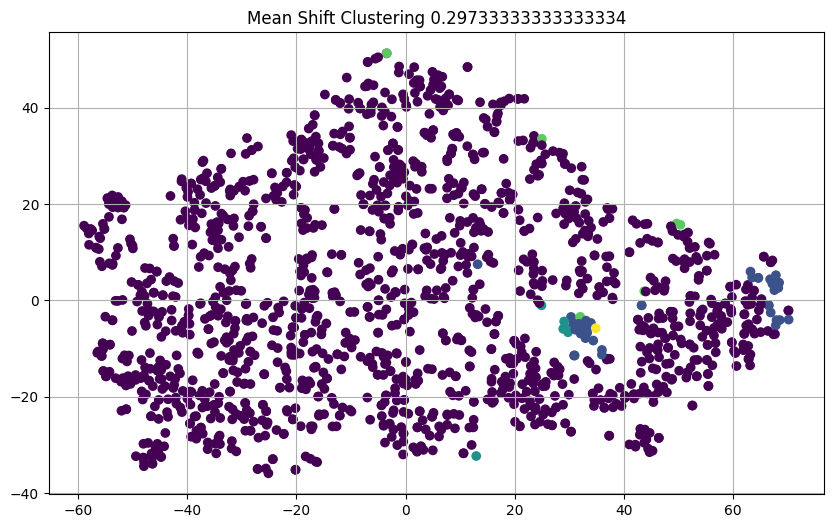

Bandwidth: 0.306
Clusters: 3


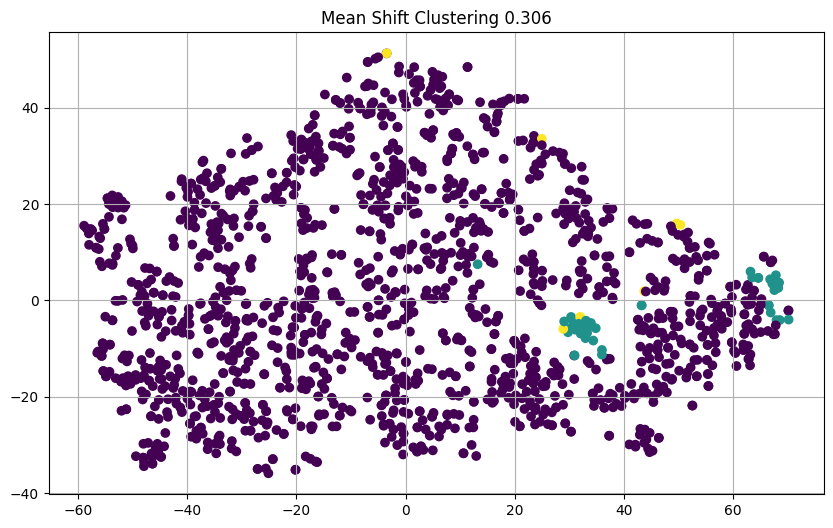

In [ ]:
tsne_clean = TSNE(n_components=2, random_state=42)
tsne_results_clean = tsne_clean.fit_transform(cleaned_data)
for bandwidth in [0.28,0.29733333333333334,0.306]: #np.linspace(0.1, 1.0, 30):
    # Inicializa el modelo MeanShift con el bandwidth actual
    print("Bandwidth:", bandwidth)
    mean_shift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
    mean_shift_labels = mean_shift.fit_predict(cleaned_data)
    print("Clusters:",len(np.unique(mean_shift_labels)))
    # Calcula las métricas
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results_clean[:, 0], tsne_results_clean[:, 1], c=mean_shift_labels, cmap='viridis')
    plt.title(f'Mean Shift Clustering {bandwidth}')
    plt.grid(True)
    plt.show()


In [ ]:
#Las metricas para evaluar que no dependen de la etiqueta de salida son: Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index


# Agglomerative Hierarchical Clustering


---



  Silhouette Coefficient: Measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Goal: Increase, because a higher silhouette score indicates better defined clusters.

  

---



  Calinski-Harabasz Index: Also known as the Variance Ratio Criterion, this metric evaluates clusters based on the ratio of between-clusters variance to the within-cluster variance. Higher scores are better, as they indicate the clusters are dense and well separated. Goal: Increase, as it signifies clearer and more defined clusters.



---



  Davies-Bouldin Index: A lower value of this index signifies a better clustering configuration, as it implies lower within-cluster distances and higher between-cluster distances. Goal: Decrease, because a lower Davies-Bouldin score indicates that the clusters are more compact and better separated.



---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# Your code here to define df_normalized

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # Keep 90% of the variance
df_pca = pca.fit_transform(df_normalized)  # This is now the PCA-reduced data

k_values = range(2, 9)

# Initialize lists to store the metrics for each k
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
cluster_labels_list = []  # To store cluster labels for each k

for k in k_values:
    # Fit the Agglomerative Hierarchical Clustering model
    ahc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    cluster_labels = ahc.fit_predict(df_pca)  # Use the PCA-reduced data
    cluster_labels_list.append(cluster_labels)  # Store the cluster labels

    # Calculate metrics
    silhouette_avg = silhouette_score(df_pca, cluster_labels)  # Use the PCA-reduced data for metrics
    calinski_harabasz_avg = calinski_harabasz_score(df_pca, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(df_pca, cluster_labels)

    # Add the scores to the lists
    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Assuming the best k is chosen based on metrics
best_k_index = silhouette_scores.index(max(silhouette_scores))  # Choosing based on the best Davies-Bouldin score
best_cluster_labels = cluster_labels_list[best_k_index]

# t-SNE Visualization
# Note: It might be interesting to also perform t-SNE on the PCA-reduced data to see how it compares
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_pca)  # Use PCA-reduced data for t-SNE


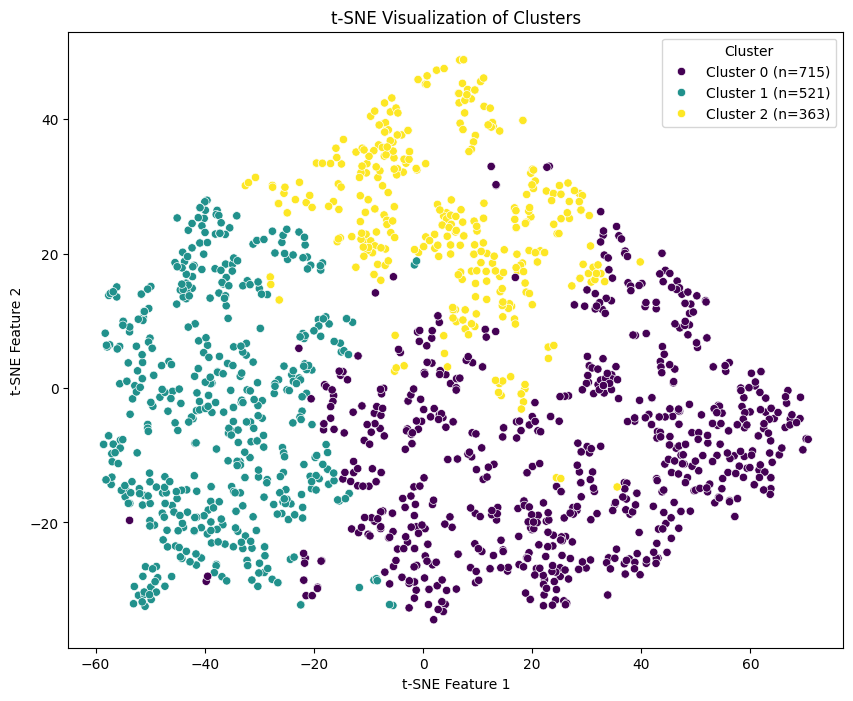

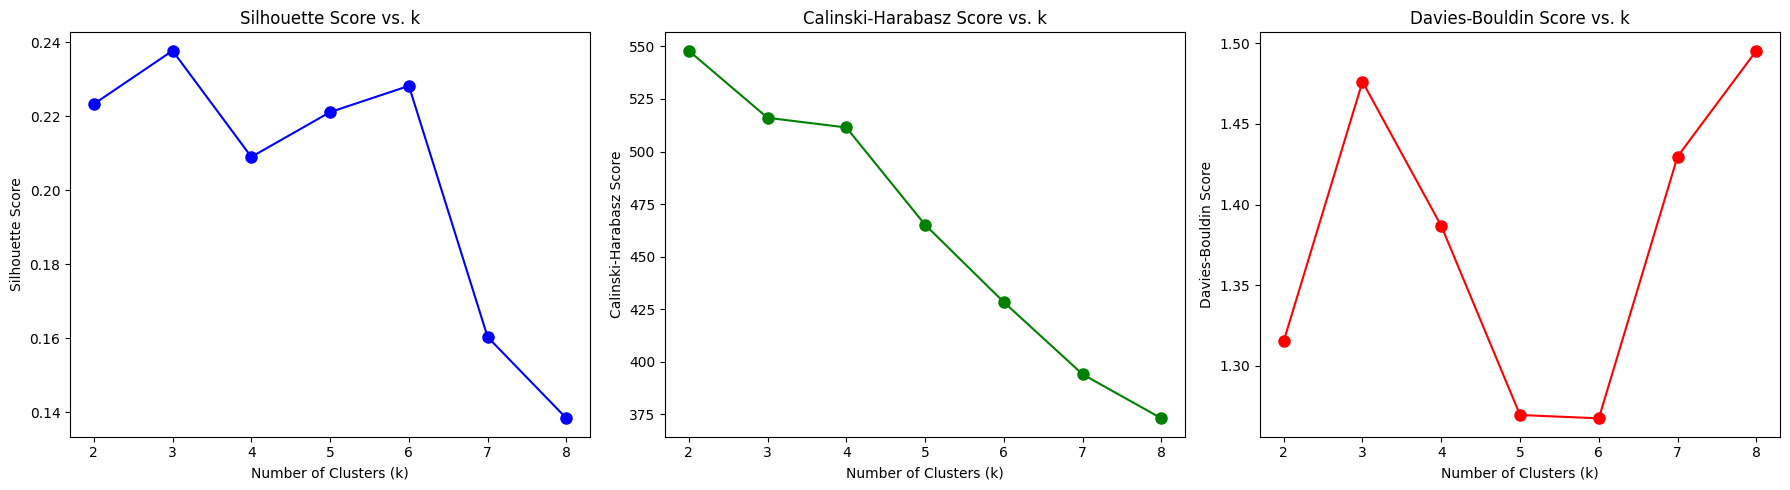

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot t-SNE visualization with cluster sizes in the legend
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=best_cluster_labels, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Count the number of points in each cluster for the best k and prepare legend labels
cluster_counts = pd.Series(best_cluster_labels).value_counts().sort_index()
legend_labels = [f'Cluster {label} (n={cluster_counts[label]})' for label in cluster_counts.index]

# Extract current handles and labels, then set the new labels
handles, _ = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=legend_labels, title='Cluster')

plt.show()

# Now, let's create the elbow plots for the clustering metrics
plt.figure(figsize=(18, 5))

# Silhouette Score plot
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

# Calinski-Harabasz Score plot
plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, 'go-', markersize=8)
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(k_values)

# Davies-Bouldin Score plot
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, 'ro-', markersize=8)
plt.title('Davies-Bouldin Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()


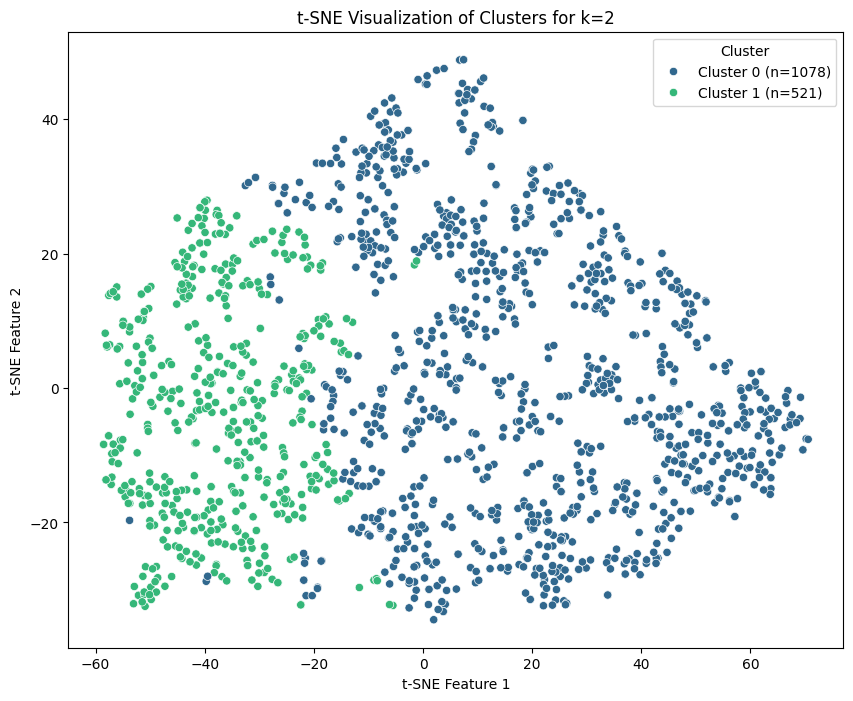

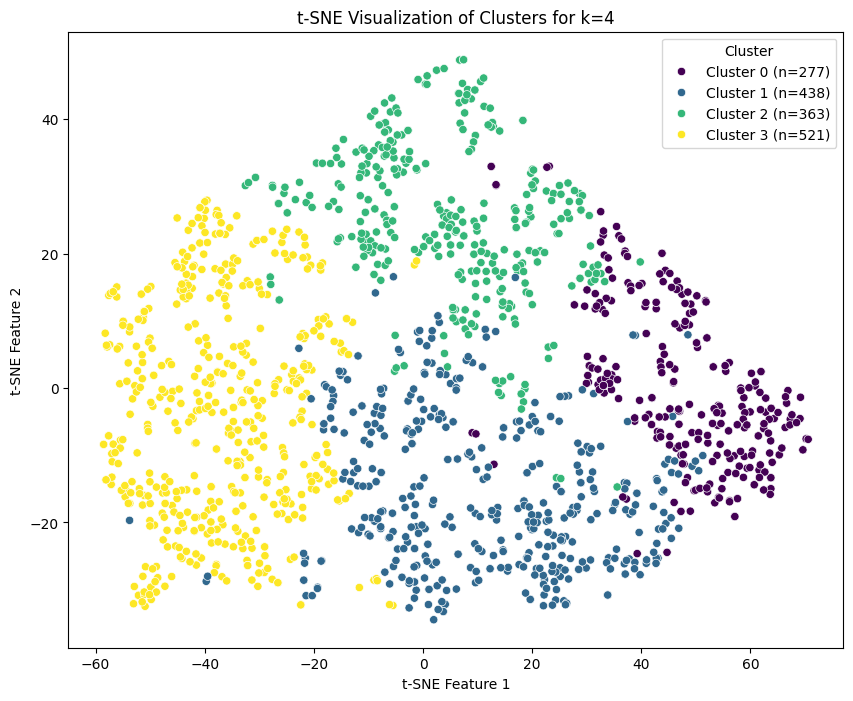

In [ ]:
best_k = k_values[best_k_index]
k_values_to_plot = [best_k - 1, best_k + 1]
k_values_to_plot = [max(2, min(val, 8)) for val in k_values_to_plot]

for k in k_values_to_plot:
    # Seleccionamos las etiquetas de cluster correspondientes a k-1 y k+1
    cluster_labels = cluster_labels_list[k_values.index(k)]

    # Generamos el plot t-SNE
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=cluster_labels, palette='viridis', legend='full')
    plt.title(f't-SNE Visualization of Clusters for k={k}')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')

    # Contamos el número de puntos en cada cluster y preparamos etiquetas de leyenda
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    legend_labels = [f'Cluster {label} (n={cluster_counts[label]})' for label in cluster_counts.index]

    # Extraemos los manejadores actuales y etiquetas, y luego configuramos las nuevas etiquetas
    handles, _ = scatter.get_legend_handles_labels()
    plt.legend(handles=handles, labels=legend_labels, title='Cluster')

    plt.show()
